In [1]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. Загрузка изображения

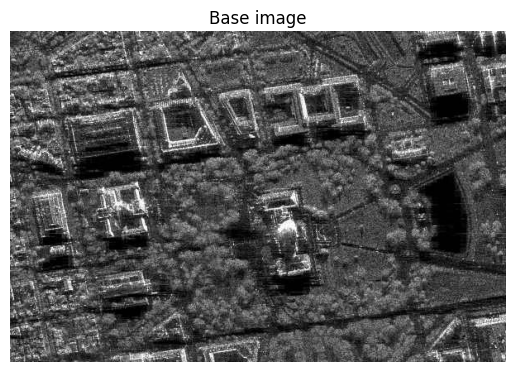

In [2]:
base_image = cv2.imread('sar_1_gray.jpg')
plt.title('Base image')
plt.axis('off')
plt.imshow(base_image)

# 2. Построение гистограммы

Text(0.5, 1.0, 'Brightness histogram')

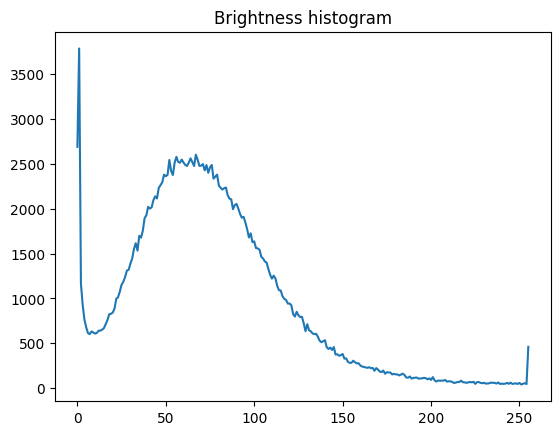

In [3]:
image_gray = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)

histSize = 256
histRange = (0, 256)
gray_hist = cv2.calcHist([image_gray], [0], None, [histSize], histRange)
plt.plot(gray_hist)
plt.title('Brightness histogram')

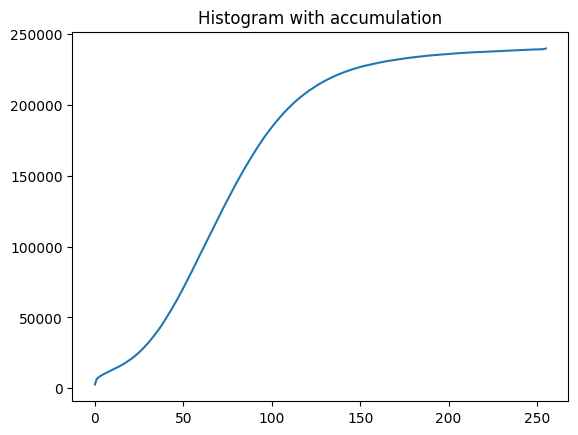

In [4]:
gray_hist_hist_cum = gray_hist.cumsum()
plt.plot(gray_hist_hist_cum)
plt.title('Histogram with accumulation')
plt.show()

# 3. Гаммакоррекция

In [5]:
def gammaCorrection(src, gamma=1.0):
    inv_gamma = 1 / gamma
    table = [((i / 255) ** inv_gamma) * 255 for i in range(256)]
    table = np.array(table, dtype=np.uint8)
    return cv2.LUT(src, table)

# 4. Гамма-фильтр. MSE, SSIM.

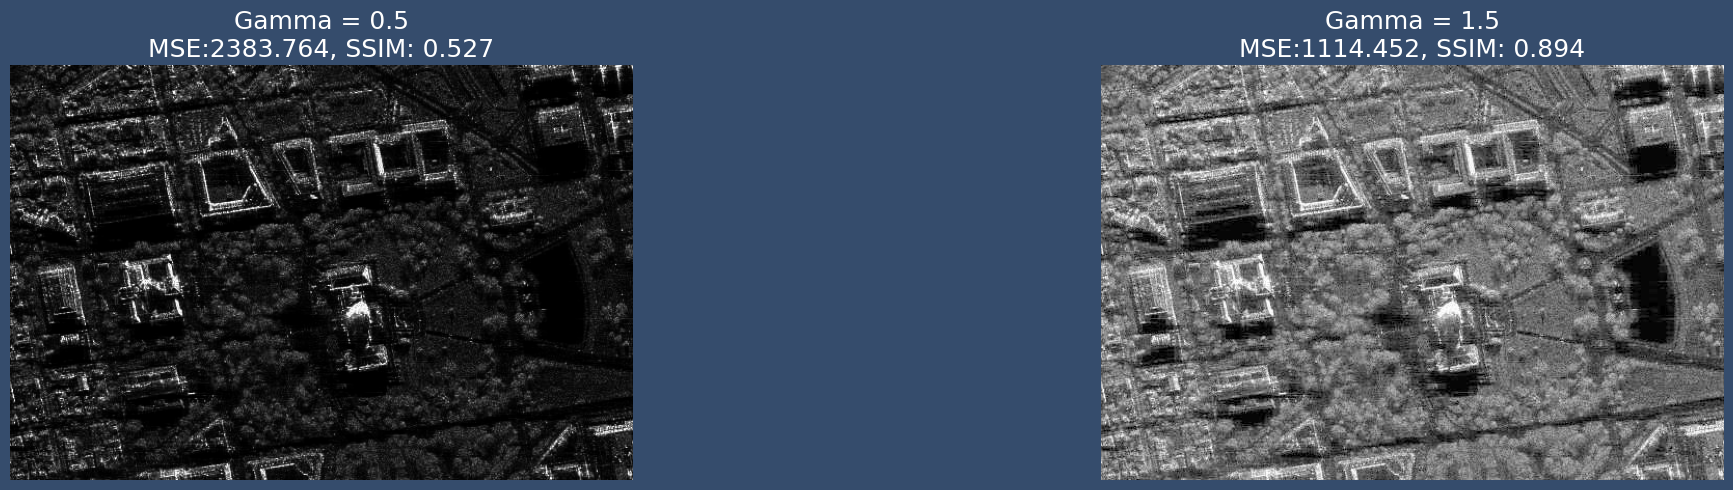

In [6]:
from skimage.metrics import structural_similarity, mean_squared_error

gammas = [0.5, 1.5]

plt.figure(figsize=(25, 5), facecolor='#354c6c')
for i, gamma in enumerate(gammas):
    img = gammaCorrection(base_image, gamma)
    gamma_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    (ssim, diff) = structural_similarity(image_gray, gamma_img, full=True)
    diff = (diff * 255).astype('uint8')
    mse = mean_squared_error(image_gray, gamma_img)

    plt.subplot(1, len(gammas), i+1)
    plt.title(f'Gamma = {gamma}\nMSE:{mse:.3f}, SSIM: {ssim:.3f}', color='white', fontsize=18)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.tight_layout()


# 5. Алгоритм статистической цветокоррекции на основе статистики eq_gray.

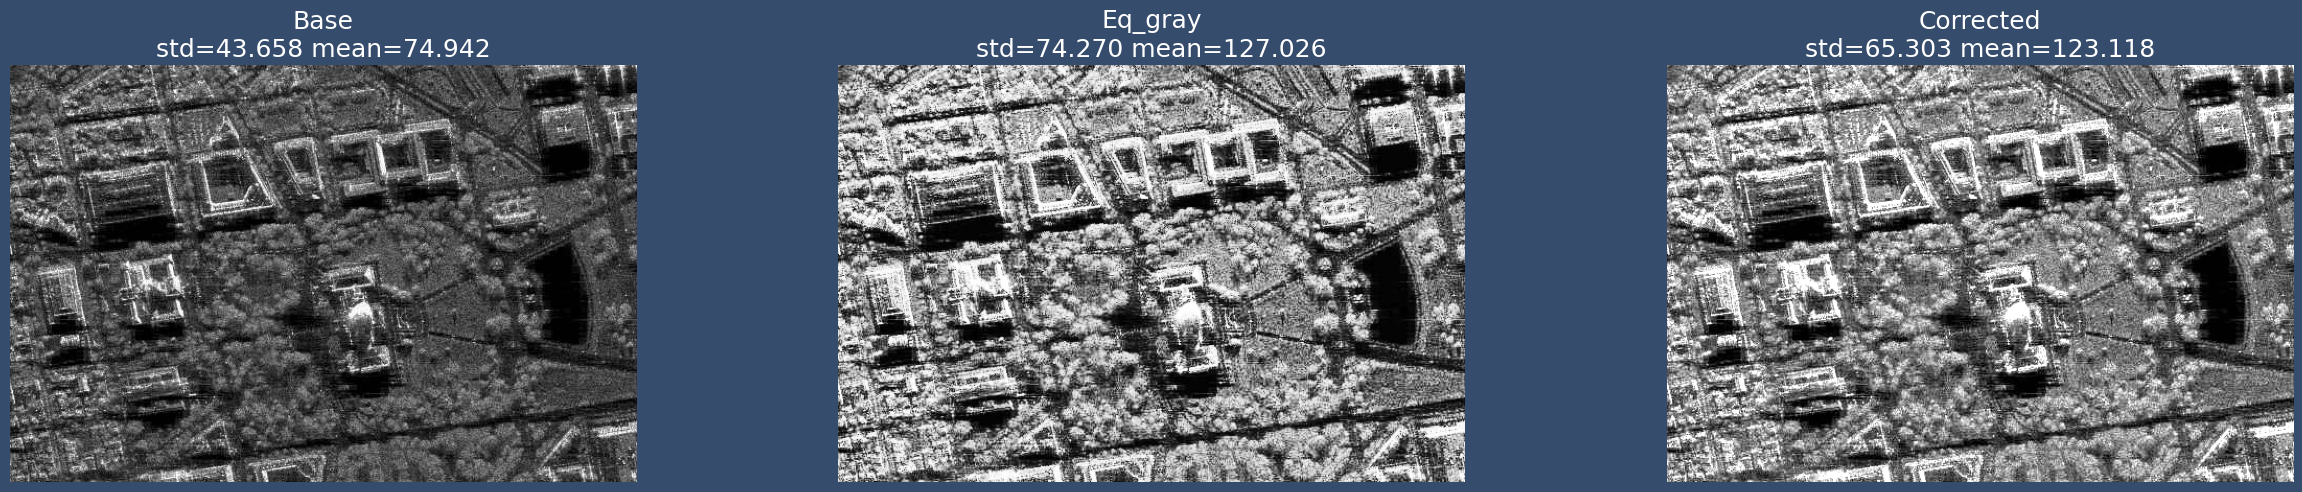

In [7]:
mean = image_gray.mean()
std = image_gray.std()

eq_gray = cv2.equalizeHist(image_gray)

mean_eq_gray = eq_gray.mean()
std_eq_gray  = eq_gray.std()

corrected_image = image_gray.astype(np.float32)
corrected_image = mean_eq_gray + (corrected_image - mean) * (std_eq_gray / std)
corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)

mean_corrected = corrected_image.mean()
std_corrected = corrected_image.std()

images_info = [
    ('Base', (image_gray, mean, std)),
    ('Eq_gray', (eq_gray, mean_eq_gray, std_eq_gray)),
    ('Corrected', (corrected_image, mean_corrected, std_corrected))
]

plt.figure(figsize=(25, 5), facecolor='#354c6c')
for i, (name, (src, mean, std)) in enumerate(images_info):
    plt.subplot(1, len(images_info), i+1)
    plt.title(f'{name}\nstd={std:.3f} mean={mean:.3f}', color='white', fontsize=18)
    plt.axis('off')
    plt.imshow(src, cmap='gray')
plt.tight_layout()
plt.show()

# 6. Пороговая фильтрация

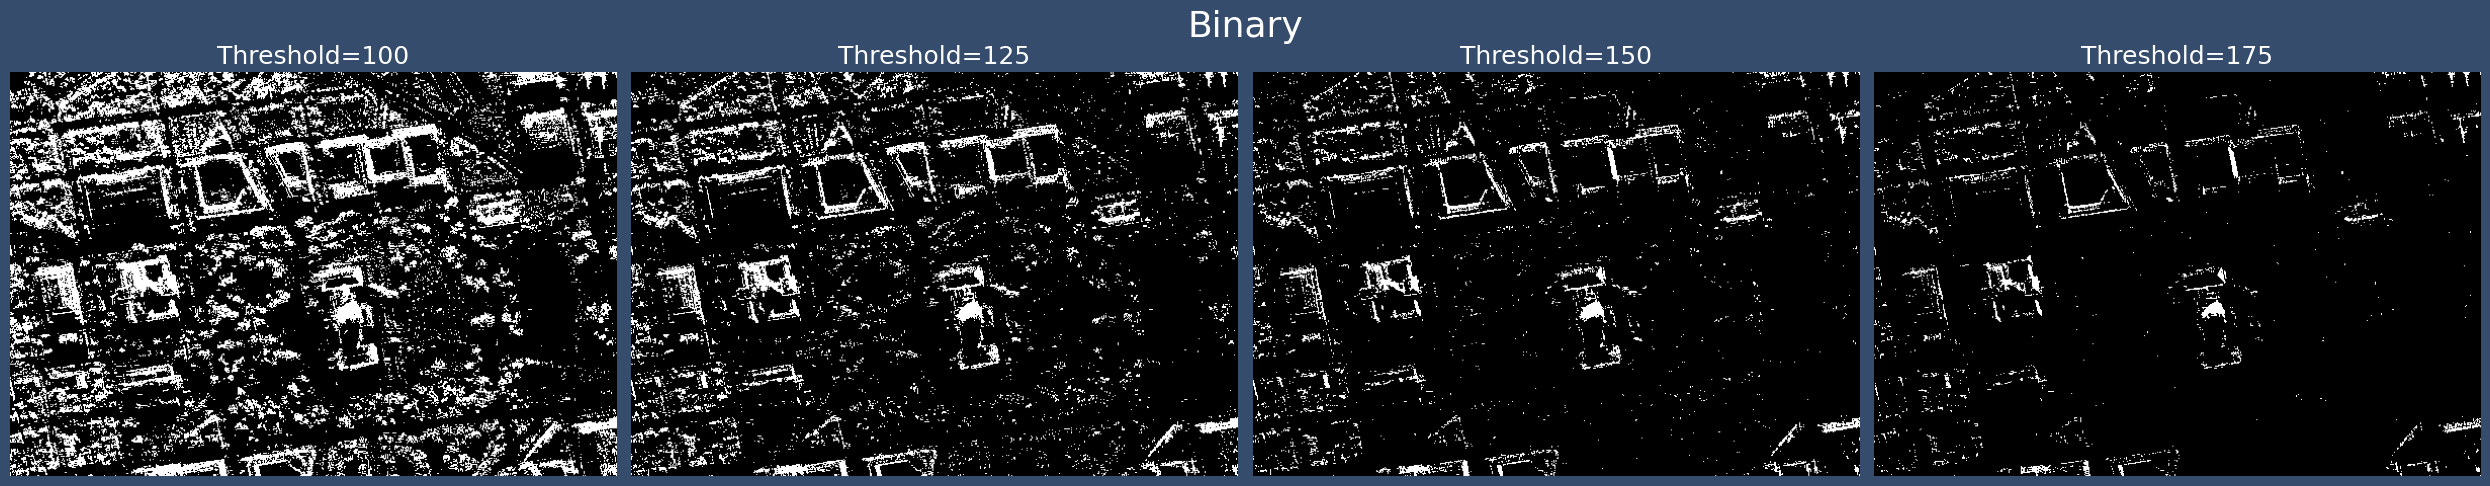

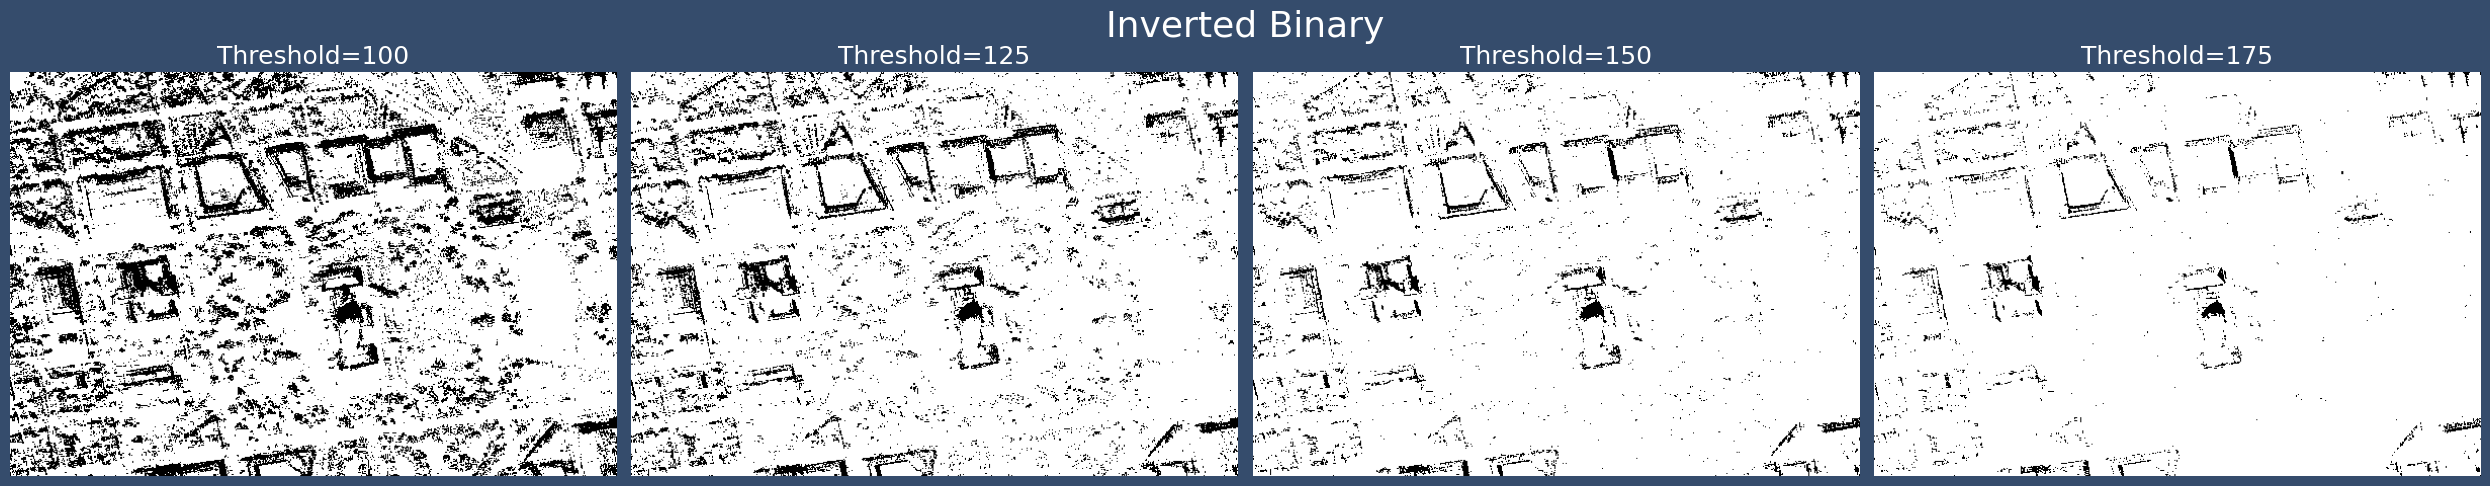

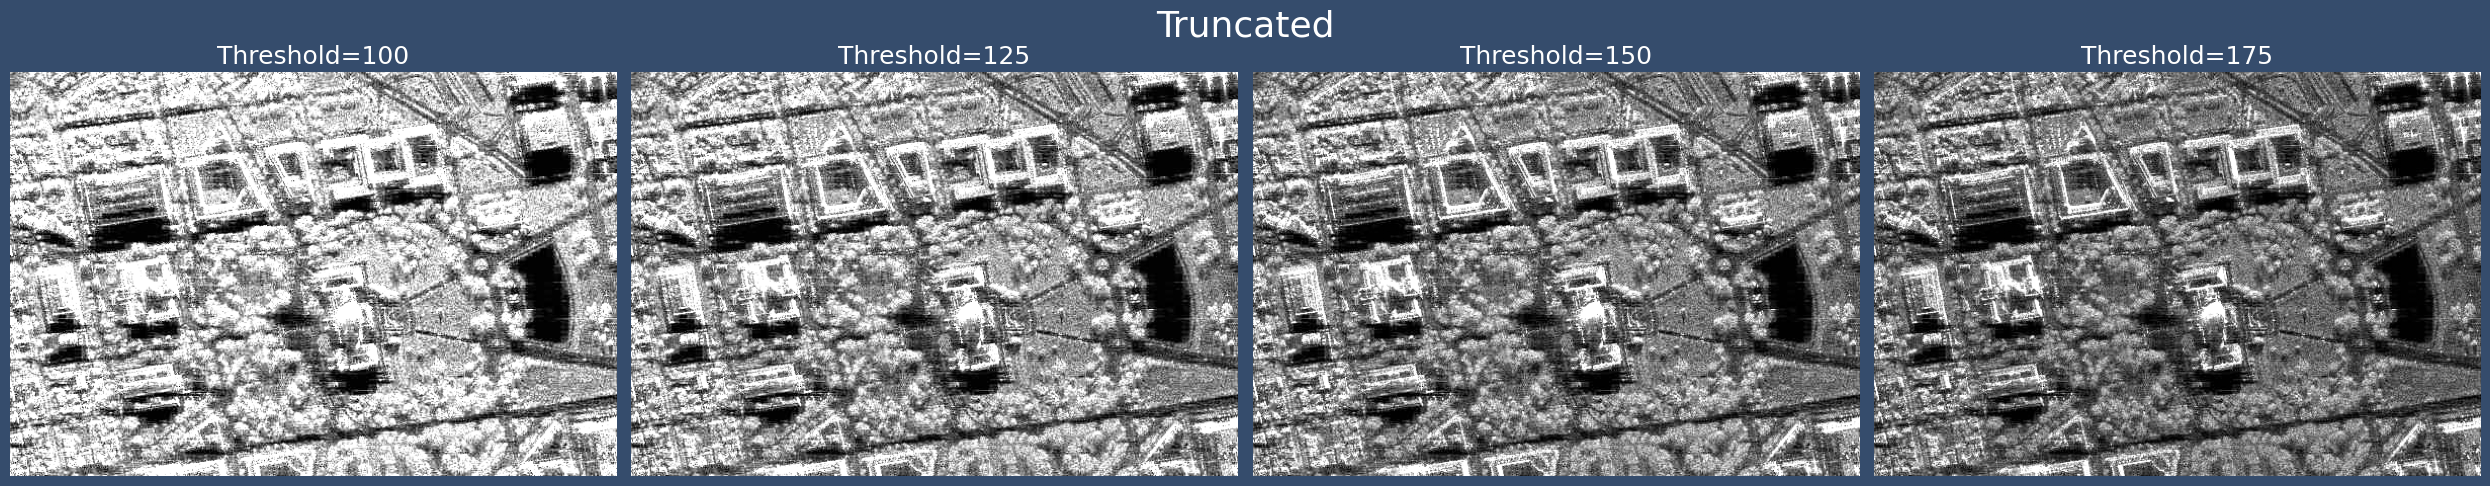

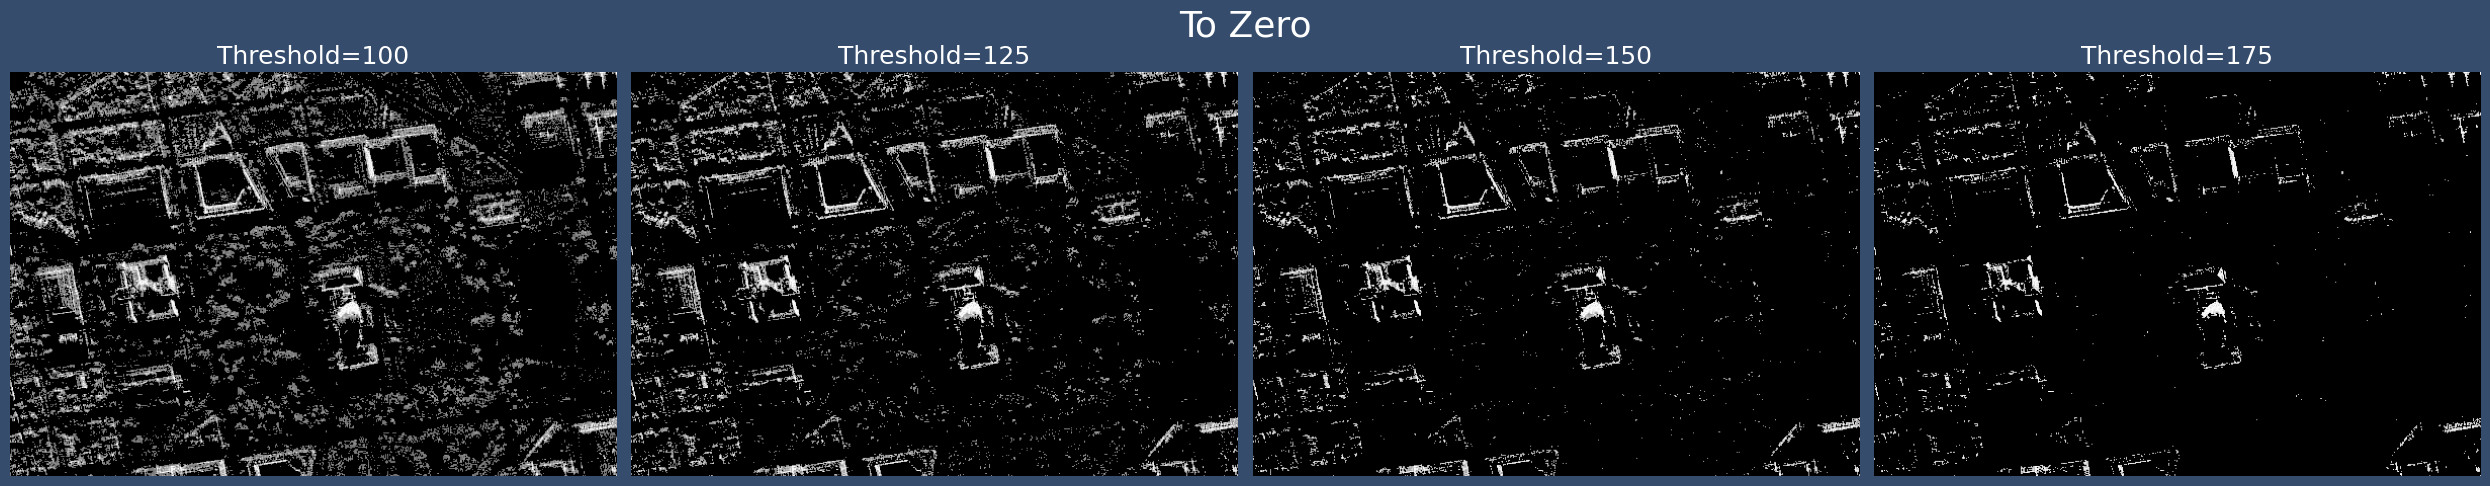

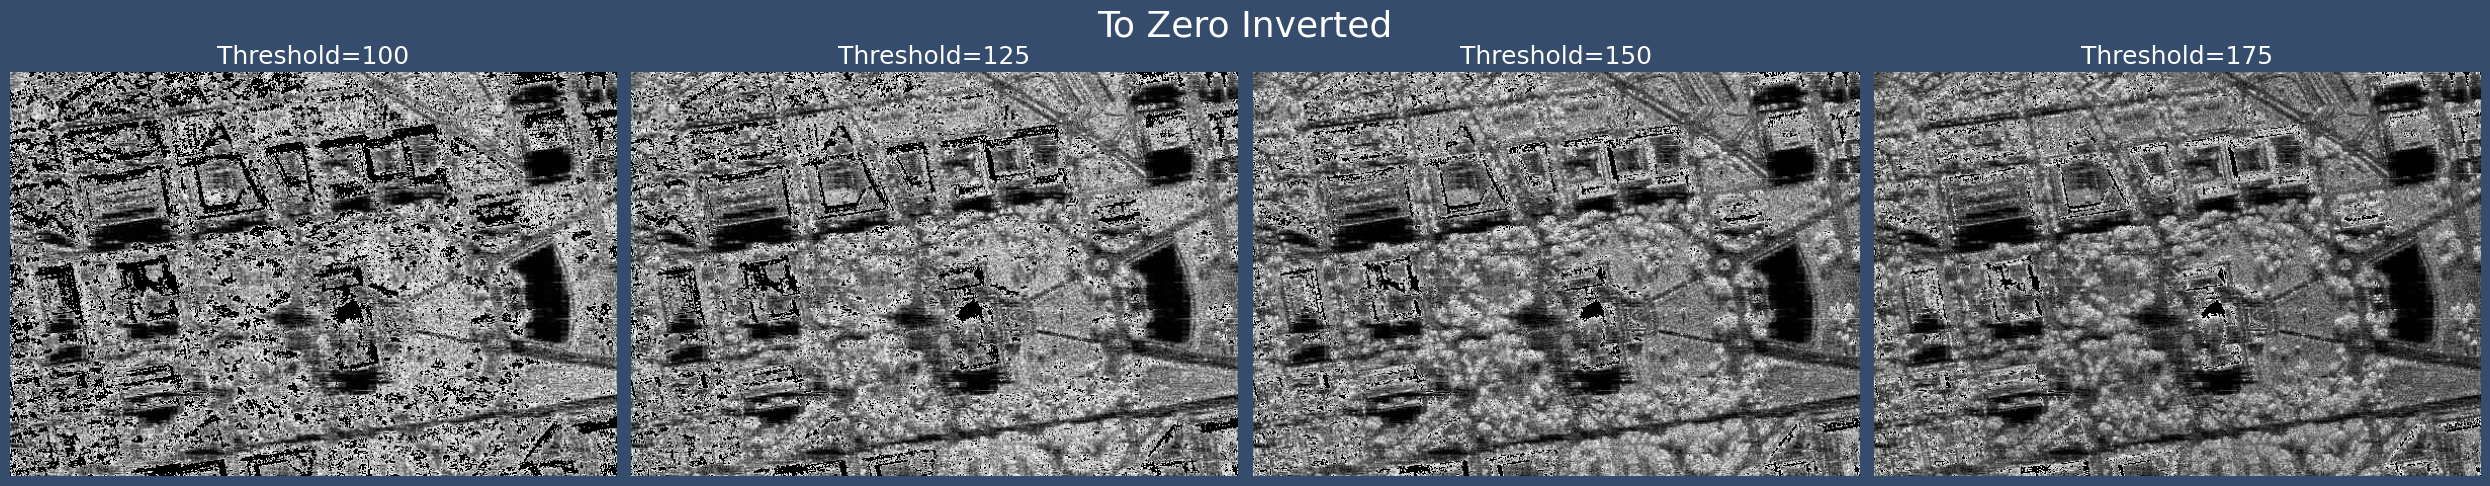

In [8]:
thresholds = [i for i in range(100, 200, 25)]
methods = [
    ('Binary', cv2.THRESH_BINARY),
    ('Inverted Binary', cv2.THRESH_BINARY_INV),
    ('Truncated', cv2.THRESH_TRUNC),
    ('To Zero', cv2.THRESH_TOZERO),
    ('To Zero Inverted', cv2.THRESH_TOZERO_INV)
]

for name, method in methods:
    plt.figure(figsize=(25, 5), facecolor='#354c6c')
    plt.suptitle(f'{name}', color='white', fontsize=26)
    for i, thres in enumerate(thresholds):
        _, thresh = cv2.threshold(image_gray, thres, 255, method)
        plt.subplot(1, len(thresholds), i+1)
        plt.title(f'Threshold={thres}', color='white', fontsize=18)
        plt.axis('off')
        plt.imshow(thresh, cmap='gray')
    plt.tight_layout()
    plt.show()